### Logistic regression 과제 -Classificatino Metrics / 최혜빈

In [119]:
import numpy as np
import pandas as pd

In [120]:
#데이터 불러오기
data = pd.read_csv('sampled_data.csv')

In [121]:
df = pd.DataFrame(data)

In [122]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,136330,2.108286,-0.020359,-2.234273,-0.124080,0.559843,-1.315913,0.631887,-0.385490,0.150628,...,0.162940,0.519705,-0.091751,-0.379542,0.418822,0.248646,-0.098857,-0.094773,7.70,0
1,116819,2.080143,-0.075408,-1.359381,0.261263,0.232201,-0.797886,0.233487,-0.330165,0.493154,...,-0.317765,-0.784150,0.233078,-0.636937,-0.191137,0.234986,-0.070648,-0.062794,17.99,0
2,27917,1.152650,0.204938,0.441832,1.211595,-0.254895,-0.383380,-0.004286,-0.019590,0.085094,...,0.066674,0.209828,-0.054351,0.058103,0.515330,-0.299402,0.032551,0.022865,21.00,0
3,97443,-0.389692,0.410148,0.616187,-0.686644,1.040312,-0.322199,0.523625,-0.037453,1.319237,...,0.116692,0.685267,-0.182303,0.767857,-0.242738,0.009678,0.115370,0.176041,6.60,0
4,17920,-1.306986,0.183306,3.164803,0.810135,1.529576,2.388322,0.551279,-0.054401,1.675481,...,-0.203993,0.556523,0.146513,-1.128693,-0.633623,-0.454903,-0.826329,-0.826186,4.95,0


In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
scaler = StandardScaler()
#scaler.fit_transform(df)

In [125]:
#df_new = pd.DataFrame(scaler.fit_transform(df))
#scaling version 따로 만들었습니다
df_x=df.drop(['Class'],axis=1)
#class변수를 제외하고 scaling하였고 scaling 후에 다시 class 변수를 추가시켰습니다
fitted = scaler.fit_transform(df_x)
new_df = pd.DataFrame(fitted, columns=df_x.columns, index=list(df_x.index.values))
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.875992,1.102273,-0.013837,-1.519427,-0.092494,0.415984,-0.996862,0.529260,-0.325542,0.140034,...,-0.389289,0.217877,0.717147,-0.171055,-0.622575,0.811479,0.520065,-0.244661,-0.298899,-0.341627
1,0.465992,1.087628,-0.047477,-0.930583,0.178984,0.173824,-0.604853,0.194623,-0.278678,0.453561,...,-0.174391,-0.431114,-1.088996,0.399380,-1.044356,-0.370659,0.491879,-0.173318,-0.193811,-0.297983
2,-1.402175,0.604964,0.123842,0.281721,0.848501,-0.186188,-0.291182,-0.005096,-0.015599,0.080048,...,-0.225029,0.087910,0.287896,-0.105378,0.094572,0.998518,-0.610760,0.087681,0.087681,-0.285216
3,0.058829,-0.197667,0.249246,0.399070,-0.488826,0.771099,-0.244885,0.438324,-0.030730,1.209704,...,-0.125580,0.155438,0.946489,-0.330075,1.257612,-0.470666,0.026986,0.297138,0.591042,-0.346292
4,-1.612250,-0.675024,0.110623,2.114412,0.565669,1.132714,1.806258,0.461553,-0.045086,1.535788,...,-0.682098,-0.277512,0.768150,0.247363,-1.850173,-1.228224,-0.931617,-2.084501,-2.702442,-0.353291


In [126]:
new_df['Class']=df['Class']

new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.875992,1.102273,-0.013837,-1.519427,-0.092494,0.415984,-0.996862,0.529260,-0.325542,0.140034,...,0.217877,0.717147,-0.171055,-0.622575,0.811479,0.520065,-0.244661,-0.298899,-0.341627,0
1,0.465992,1.087628,-0.047477,-0.930583,0.178984,0.173824,-0.604853,0.194623,-0.278678,0.453561,...,-0.431114,-1.088996,0.399380,-1.044356,-0.370659,0.491879,-0.173318,-0.193811,-0.297983,0
2,-1.402175,0.604964,0.123842,0.281721,0.848501,-0.186188,-0.291182,-0.005096,-0.015599,0.080048,...,0.087910,0.287896,-0.105378,0.094572,0.998518,-0.610760,0.087681,0.087681,-0.285216,0
3,0.058829,-0.197667,0.249246,0.399070,-0.488826,0.771099,-0.244885,0.438324,-0.030730,1.209704,...,0.155438,0.946489,-0.330075,1.257612,-0.470666,0.026986,0.297138,0.591042,-0.346292,0
4,-1.612250,-0.675024,0.110623,2.114412,0.565669,1.132714,1.806258,0.461553,-0.045086,1.535788,...,-0.277512,0.768150,0.247363,-1.850173,-1.228224,-0.931617,-2.084501,-2.702442,-0.353291,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28475,-1.269851,-0.303659,0.045113,1.652929,0.549944,-0.343748,1.176108,-0.300411,0.632508,0.600344,...,0.152658,0.798688,-0.012156,-0.489836,-0.263086,-0.676960,0.320643,0.103960,-0.148559,0
28476,0.717842,1.005432,-0.160124,-1.274450,0.223870,0.311822,-0.612151,0.464676,-0.280385,0.046481,...,0.111694,0.395568,-0.135871,-0.513670,0.430712,1.253071,-0.281188,-0.248409,-0.038367,0
28477,-0.428102,-1.771869,-0.421366,0.944253,-1.515500,0.294278,-0.779094,-2.189361,-2.011887,1.684925,...,-2.046568,0.404609,-4.579363,0.428147,-0.572160,-0.415799,0.480802,-0.906453,0.375804,0
28478,0.906084,0.670550,-1.069014,-0.594471,0.304593,-0.827940,-0.147452,-0.270542,0.052176,0.971411,...,0.552837,0.515797,-0.295245,-0.511557,-1.032926,1.283600,-0.299928,0.007600,1.216236,0


In [127]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,136330,2.108286,-0.020359,-2.234273,-0.124080,0.559843,-1.315913,0.631887,-0.385490,0.150628,...,0.162940,0.519705,-0.091751,-0.379542,0.418822,0.248646,-0.098857,-0.094773,7.70,0
1,116819,2.080143,-0.075408,-1.359381,0.261263,0.232201,-0.797886,0.233487,-0.330165,0.493154,...,-0.317765,-0.784150,0.233078,-0.636937,-0.191137,0.234986,-0.070648,-0.062794,17.99,0
2,27917,1.152650,0.204938,0.441832,1.211595,-0.254895,-0.383380,-0.004286,-0.019590,0.085094,...,0.066674,0.209828,-0.054351,0.058103,0.515330,-0.299402,0.032551,0.022865,21.00,0
3,97443,-0.389692,0.410148,0.616187,-0.686644,1.040312,-0.322199,0.523625,-0.037453,1.319237,...,0.116692,0.685267,-0.182303,0.767857,-0.242738,0.009678,0.115370,0.176041,6.60,0
4,17920,-1.306986,0.183306,3.164803,0.810135,1.529576,2.388322,0.551279,-0.054401,1.675481,...,-0.203993,0.556523,0.146513,-1.128693,-0.633623,-0.454903,-0.826329,-0.826186,4.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28475,34214,-0.593368,0.076106,2.479141,0.787814,-0.468074,1.555597,-0.355871,0.745527,0.653514,...,0.114633,0.578569,-0.001268,-0.298537,-0.135632,-0.331485,0.124664,0.027819,53.22,0
28476,128804,1.922195,-0.259743,-1.870291,0.324977,0.418911,-0.807530,0.554997,-0.332180,0.048422,...,0.084291,0.287557,-0.071716,-0.313082,0.222354,0.603893,-0.113299,-0.079409,79.20,0
28477,74271,-3.414694,-0.687238,1.426208,-2.143933,0.395175,-1.028140,-2.604747,-2.376290,1.838413,...,-1.514325,0.294084,-2.602020,0.261669,-0.295107,-0.204915,0.187991,-0.279656,176.85,0
28478,137762,1.278683,-1.747044,-0.859994,0.439557,-1.123184,-0.193445,-0.320310,0.060421,1.058903,...,0.411044,0.374350,-0.162470,-0.311792,-0.532853,0.618689,-0.120710,-0.001504,375.00,0


In [128]:
df['Class'].value_counts()

0    28428
1       52
Name: Class, dtype: int64

In [129]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.875992,1.102273,-0.013837,-1.519427,-0.092494,0.415984,-0.996862,0.529260,-0.325542,0.140034,...,0.217877,0.717147,-0.171055,-0.622575,0.811479,0.520065,-0.244661,-0.298899,-0.341627,0
1,0.465992,1.087628,-0.047477,-0.930583,0.178984,0.173824,-0.604853,0.194623,-0.278678,0.453561,...,-0.431114,-1.088996,0.399380,-1.044356,-0.370659,0.491879,-0.173318,-0.193811,-0.297983,0
2,-1.402175,0.604964,0.123842,0.281721,0.848501,-0.186188,-0.291182,-0.005096,-0.015599,0.080048,...,0.087910,0.287896,-0.105378,0.094572,0.998518,-0.610760,0.087681,0.087681,-0.285216,0
3,0.058829,-0.197667,0.249246,0.399070,-0.488826,0.771099,-0.244885,0.438324,-0.030730,1.209704,...,0.155438,0.946489,-0.330075,1.257612,-0.470666,0.026986,0.297138,0.591042,-0.346292,0
4,-1.612250,-0.675024,0.110623,2.114412,0.565669,1.132714,1.806258,0.461553,-0.045086,1.535788,...,-0.277512,0.768150,0.247363,-1.850173,-1.228224,-0.931617,-2.084501,-2.702442,-0.353291,0


### 1번. Logistic Regression 진행하기
(그냥 version과 scaling versino 둘 다 진행해보았습니다)

In [130]:
from sklearn.linear_model import LogisticRegression #logisticregression은 sklearn 패키지를 사용하였습니다
from sklearn.model_selection import train_test_split


In [131]:
#trainset과 testset을 분류하였고
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1],random_state = 0)

In [132]:
#train set, test set 구분 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21360, 30), (7120, 30), (21360,), (7120,))

In [133]:
classifier = LogisticRegression() #로지스틱 회귀모델 사용
classifier.fit(X_train,y_train) #trainset을 fit시키고

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
#classfier을 통해 얻은 y 예측값을 구한다
#logistic regression, classification이므로 0또는 1의 값으로 나온다
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [135]:
#y 예측값이 1인 확률 역시 구해본다
classifier.predict_proba(X_test)

array([[9.99209106e-01, 7.90894246e-04],
       [9.99738708e-01, 2.61292060e-04],
       [9.99998580e-01, 1.42049928e-06],
       ...,
       [9.96341932e-01, 3.65806843e-03],
       [9.99395800e-01, 6.04199595e-04],
       [9.99578107e-01, 4.21893358e-04]])

In [136]:
#mean accuracy 확인해보았습니다
classifier.score(X_test,y_test)

0.998876404494382

In [137]:
#똑같은 과정을 scaling한 데이터도 진행하였습니다
#Scaled Version
X_train2, X_test2, y_train2, y_test2 = train_test_split(new_df.iloc[:, :-1], new_df.iloc[:, -1], random_state = 0)

In [138]:
classifier2 = LogisticRegression()
classifier2.fit(X_train2, y_train2)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
y_pred2 = classifier2.predict(X_test2) # class 예측
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [140]:
classifier2.score(X_test2, y_test2) # Scaling 후 성능 향상!
#scaling 후 mean accuracy를 찍어보니 약간 향상되었음을 확인할 수 있었습니다

0.9998595505617978

### 2번. Confusion Matrix 찍어보기 → Mean Accuracy와 비교

confusion matrix란 training을 통한 prediction 성능을 측정하기 위해
예측 value와 실제 value를 비교하기 위한 표입니다


In [141]:
from sklearn.metrics import *

f1-score은 recall과 precision을 이용한 조화평균을 이용한 score인데 이 두 값이 어느정도 균형을 이룰 때 높게 나온다

recall은 input된 class에 대해 classifier가 어떤 class로 예측을 하는지에 대한 척도이고,
precision은 예측한 값들 중에서 제대로 예측했는지에 대한 척도입니다

잘 이해가 안되어서
https://nittaku.tistory.com/295 이걸 참고하여 이해했습니다..!

In [142]:
#confusion matrix를 찍어보았습니다
confusion_matrix(y_test,y_pred)

array([[7108,    3],
       [   5,    4]], dtype=int64)

In [143]:
accuracy_score(y_test,y_pred)
#앞서 구한 mean accuracy와 똑같이 나옵니다
#accuracy: 예측 결과가 실제와 얼마나 동일한지를 측정
#(TP+TN)/(TP+FN+FP+TN)

0.998876404494382

In [144]:
f1_score(y_test,y_pred) #다른 지표들도 구해보았습니다
#f1-score: precision과 recall을 결합한 지표(2*(precision*recall/(precision+recall)))

0.5

In [145]:
roc_auc_score(y_test,y_pred) #roc auc score도 이용해 성능을 평가했습니다(뒤에서 비교할 때 사용)
#AUC : roc curve 아래의 면적으로, 클수록(1에 가까울수록) 좋음!

0.7220112814262724

In [146]:
recall_score(y_test,y_pred)
#recall: TP/(FN+TP)

0.4444444444444444

In [147]:
precision_score(y_test,y_pred)
#precision: TP/(FP+TP)

0.5714285714285714

In [148]:
#scaling version도 똑같이 구하였습니다
#confusion matrix를 찍어보고
confusion_matrix(y_test2,y_pred2)

array([[7111,    0],
       [   1,    8]], dtype=int64)

In [149]:
accuracy_score(y_test2,y_pred2)
#이 역시 아까 구한 값과 똑같이 나옵니다

0.9998595505617978

In [150]:
#scaling version도 다른 지표들도 구해 보았습니다
f1_score(y_test2, y_pred2)


0.9411764705882353

In [151]:
roc_auc_score(y_test2,y_pred2) #이거도 뒤에서 비교할때 사용했습니다

0.9444444444444444

In [152]:
recall_score(y_test2,y_pred2)

0.8888888888888888

In [153]:
precision_score(y_test2,y_pred2)

1.0

### 3번. Logistic은 cut-off를 어떻게 설정하느냐에 따라 Classification의 성능이 달라짐. 최적의 Cut-off를 ROC 커브를 사용해 서 찾아보세요. 또한 새롭게 찾은 cut-off로 예측을 다시 진행하여 성능 평가를 진행하세요(mean accuracy 제외).


In [154]:
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
# fpr = 1-specificity
# tpr = sensitivity
# thresholds = 해당 fpr, tpr을 리턴할 때의 thesholds(cut-off) 값!

In [156]:
#최적의 cutoff값을 찾기 위해 결정함수가 아닌 앞서 구한 predict score의 값을 가져와
#적절한 thresholds값을 찾았습니다
#1로 예측할 확률을 predscore로 정의.
pred_score=classifier.predict_proba(X_test)[:,1]

In [157]:
pred_score

array([7.90894246e-04, 2.61292060e-04, 1.42049928e-06, ...,
       3.65806843e-03, 6.04199595e-04, 4.21893358e-04])

In [158]:
fpr,tpr,thresholds = roc_curve(y_test,pred_score)

Text(0, 0.5, 'Sensitivity')

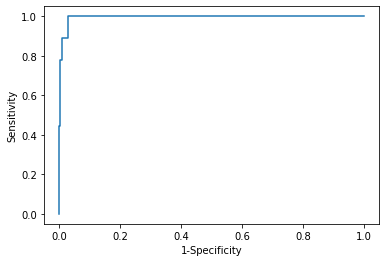

In [159]:
#roc curve그려보았습니다
x = fpr
y = tpr

plt.plot(x,y)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

In [160]:
res = [[fpr_i, tpr_i, thres_i] for fpr_i, tpr_i, thres_i in zip(fpr, tpr, thresholds)]
res

[[0.0, 0.0, 1.99999996277483],
 [0.0, 0.1111111111111111, 0.9999999627748299],
 [0.0, 0.2222222222222222, 0.9999743030401465],
 [0.0001406271972999578, 0.2222222222222222, 0.9987101056722099],
 [0.0001406271972999578, 0.3333333333333333, 0.961486138324919],
 [0.00042188159189987344, 0.3333333333333333, 0.6377590391882765],
 [0.00042188159189987344, 0.4444444444444444, 0.5480648497676882],
 [0.0007031359864997891, 0.4444444444444444, 0.3677194548486106],
 [0.0007031359864997891, 0.5555555555555556, 0.36116172003101726],
 [0.001546899170299536, 0.5555555555555556, 0.1364743131323381],
 [0.001546899170299536, 0.6666666666666666, 0.13398855807607823],
 [0.002953171143299114, 0.6666666666666666, 0.08674769295102296],
 [0.002953171143299114, 0.7777777777777778, 0.07938603463799468],
 [0.008859513429897343, 0.7777777777777778, 0.03257216838073841],
 [0.008859513429897343, 0.8888888888888888, 0.03222970134151204],
 [0.02770355786809169, 0.8888888888888888, 0.013500255362707096],
 [0.0277035578

In [161]:
#fpr과 tpr값 차이가 가장 큰 값을 찾아 cut off 값을 찾아서 성능을 평가해보았습니다
res = [[abs(fpr_i- tpr_i), thres_i] for fpr_i, tpr_i, thres_i in zip(fpr, tpr, thresholds)]
max(res)
#threshold(cut off): 0.013377036978403109이 나왔습니다

[0.9722964421319084, 0.013377036978403109]

In [162]:
#구한 cutoff값을 이용하여 그 값보다 큰 경우 true, 작은 경우 false로 구한 뒤 confusion matrix를 구했습니다
confusion_matrix(y_test,pred_score >0.013377036978403109)

array([[6914,  197],
       [   1,    8]], dtype=int64)

In [163]:
#roc curve의 roccurve의 auc score값을 통해 성능을 확인하였습니다
roc_auc_score(y_test,pred_score>0.013377036978403109)

# 2번에서 로지스틱회귀를 진행하였을 때 0.7220112814262724였는데
# cutoff를 설정하고 나서 roc_auc_score이 증가하였음을 확인할 수 있습니다
#성능 좋아짐!

0.9305926655103987

In [164]:
f1_score(y_test,pred_score>0.013377036978403109)
#f1score은 감소하였습니다

0.07476635514018691

In [165]:
#동일한 방식을 앞서 scaling한 version 똑같이 진행하였습니다

In [166]:
pred_score2=classifier2.predict_proba(X_test2)[:,1]


In [167]:
pred_score2

array([0.00053345, 0.00137104, 0.00023725, ..., 0.00033921, 0.00428698,
       0.00207661])

In [168]:
fpr2,tpr2,thresholds2 = roc_curve(y_test2,pred_score2)

Text(0, 0.5, 'Sensitivity')

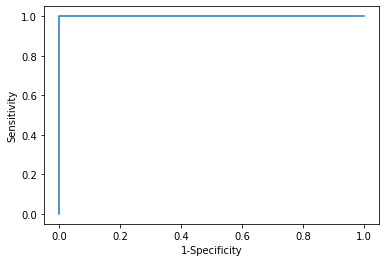

In [169]:
#scaling version roc curve 그리기
x = fpr2
y = tpr2

plt.plot(x,y)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

#scaling version이라 그런지 roc curve자체가 굉장히 좋게 나오더라고요
#그래도 cutoff값을 찾아보았습니다!

In [170]:
res2 = [[fpr_i, tpr_i, thres_i] for fpr_i, tpr_i, thres_i in zip(fpr2, tpr2, thresholds2)]
res2

[[0.0, 0.0, 1.9999995235185173],
 [0.0, 0.1111111111111111, 0.9999995235185172],
 [0.0, 0.8888888888888888, 0.7347856987302641],
 [0.00042188159189987344, 0.8888888888888888, 0.18573960979032114],
 [0.00042188159189987344, 1.0, 0.14897425361235758],
 [0.4636478694979609, 1.0, 0.0005036185022503212],
 [0.4639291238925608, 1.0, 0.000503557405250285],
 [1.0, 1.0, 6.890831924312993e-08]]

In [171]:
res2 = [[abs(fpr_i-tpr_i), thres_i] for fpr_i, tpr_i, thres_i in zip(fpr2, tpr2, thresholds2)]
max(res2)

#threshold = 0.14897425361235758 (cut off)



[0.9995781184081002, 0.14897425361235758]

In [172]:
confusion_matrix(y_test2,pred_score2 > 0.14897425361235758)

array([[7108,    3],
       [   1,    8]], dtype=int64)

In [173]:
roc_auc_score(y_test2,pred_score2 > 0.14897425361235758)

#cutoff값을 정하기 전도 너무 완벽한 roc curve를 보였듯이
#오히려 cutoff값을 정해서 roc_auc_score값을 정하니까 2번에서 구했던 그 전(0.9444444444444444)보다
#아주 약간 감소하였습니다

0.9442335036484945

In [174]:
f1_score(y_test2,pred_score2 >0.14897425361235758 )
#f1_score값도 감소하였습니다

0.7999999999999999